### Memoria compartida

Cuando se realiza una programación concurrente, generalmente es mejor evitar el uso del recursos compartidos en la medida de lo posible. Esto es particularmente cierto cuando se utilizan múltiples procesos.
Sin embargo, si se necesita utilizar algunos datos compartidos, el multiprocesamiento proporciona un medio para hacerlo.

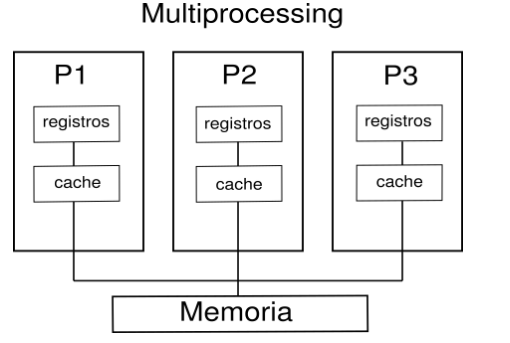

In [1]:
from IPython.display import Image
Image("img/mem-multiprocessing.png", width=360, height=420)

Los datos se pueden almacenar en un mapa de memoria compartida usando `Value` o `Array`.

Es posible compatir valores unitarios del proceso hijo al proceso padre por medio del método `Value` de multiprocessing.

In [ ]:
def escribe_num(val):
    num = val.value * val.value
    print("El cuadrado de ", num)
    
t = time.time()
valor = mp.Value('d', 5.0)
p1 = mp.Process(target=escribe_num, args=(valor,))

p1.start()
p1.join()

print("Resultado fuera del proceso:", valor.value)

In [ ]:
import multiprocessing as mp
import time

def calc_cuad(numeros, result):
    for idx, n in enumerate(numeros):
        result[idx] = n * n # es un arreglo de C y debo manejarlo a través de sus índices
        
    print("Resultado del proceso:", result[:])    

nums = range(10)

t = time.time()
result = mp.Array('i', 10)
p1 = mp.Process(target=calc_cuad, args=(nums,result))

p1.start()
p1.join()

print("Resultado fuera del proceso:", result[:]) # ¿vamos a poder ver el contenido de result?

print("Tiempo de ejecución: ", time.time()-t)
print("Finaliza ejecución")